In [1]:
import torch
from torch import nn
from d2l import torch as d2l

<div>
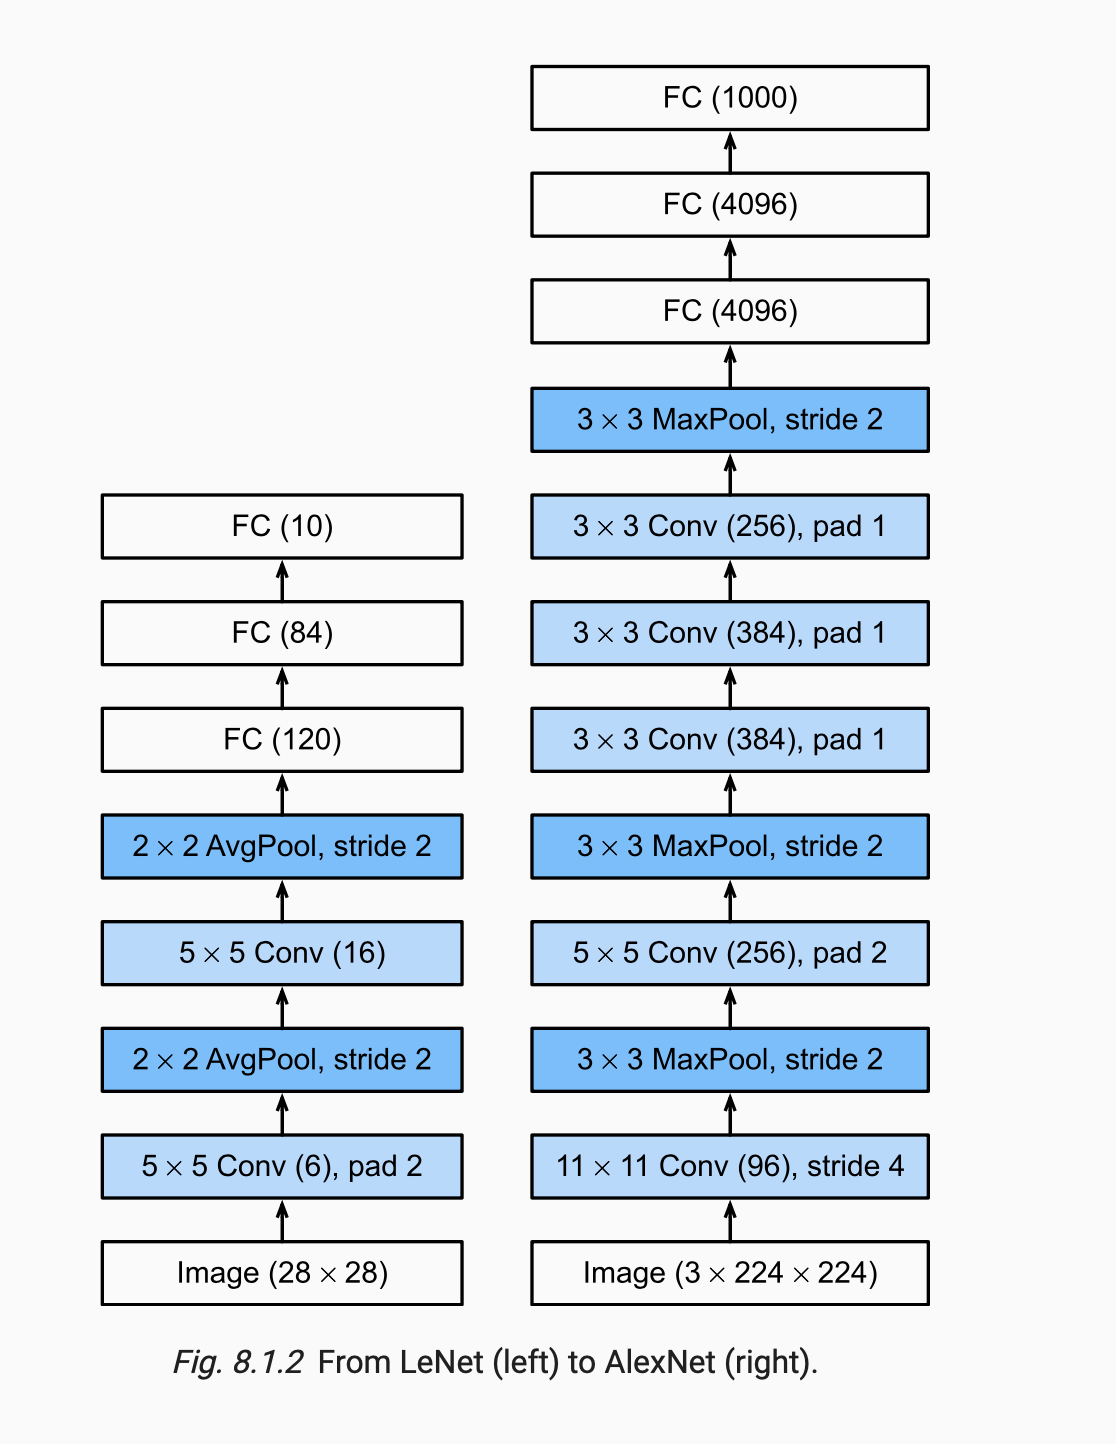
</div>

In [2]:
class AlexNet(d2l.Classifier):
    def __init__(self,lr=0.1,num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net=nn.Sequential(nn.LazyConv2d(96,padding=1,stride=4,kernel_size=11),nn.ReLU(),nn.MaxPool2d(kernel_size=3,stride=2),
                               nn.LazyConv2d(256,kernel_size=5,padding=2),nn.ReLU(),nn.MaxPool2d(kernel_size=3,stride=2),
                               nn.LazyConv2d(384,padding=1,kernel_size=3),nn.ReLU(),
                               nn.LazyConv2d(384,padding=1,kernel_size=3),nn.ReLU(),
                               nn.LazyConv2d(256,padding=1,kernel_size=3),nn.ReLU(),nn.MaxPool2d(kernel_size=3,stride=2),
                               nn.Flatten(),
                               nn.LazyLinear(4096),nn.ReLU(),nn.Dropout(p=0.5),
                               nn.LazyLinear(4096),nn.ReLU(),nn.Dropout(p=0.5),
                               nn.LazyLinear(num_classes)
                              )
        self.net.apply(d2l.init_cnn)

In [4]:
AlexNet().layer_summary((1,1,224,224))

/Users/juicydoggo/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

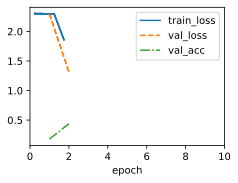

In [ ]:
model=AlexNet(lr=0.01)
data=d2l.FashionMNIST(batch_size=128,resize=(224,224))
trainer=d2l.Trainer(max_epochs=10)
trainer.fit(model,data)